In [1]:
lapply(c("dplyr", "Seurat", "ggplot2"), library, character.only = T)
options(repr.plot.width=15, repr.plot.height=15)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.5.0 but the current version is
4.5.1; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
 [1] "Seurat"       "SeuratObject" "sp"           "dplyr"        "stats"       
 [6] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[11] "base"        

[[3]]
 [1] "ggplot2"      "Seurat"       "SeuratObject" "sp"           "dplyr"       
 [6] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[11] "methods"      "base"

In [ ]:
xenium_path <- "./dat/Xenium_V1_humanLung_Cancer_FFPE"
xenium.obj <- LoadXenium(xenium_path, fov = "fov", molecule.coordinates = FALSE)
DefaultAssay(xenium.obj) <- "Xenium"

Warning message:
“cells did not contain a segmentation_method column. Skipping...”
Genome matrix has multiple modalities, returning a list of matrices for this genome

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
head(xenium.obj@meta.data)

,orig.ident,nCount_Xenium,nFeature_Xenium,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe
,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
aaaadpbp-1,SeuratProject,0,0,0,0,0,0,0,0
aaaaficg-1,SeuratProject,19,15,0,0,0,0,0,0
aaabbaka-1,SeuratProject,53,38,0,0,0,0,0,0
aaabbjoo-1,SeuratProject,29,18,0,0,0,0,0,0
aaablchg-1,SeuratProject,42,33,1,1,0,0,0,0
aaacaicl-1,SeuratProject,135,62,0,0,0,0,0,0


Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Default search for "data" layer in "Xenium" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Rasterizing points since number of points exce

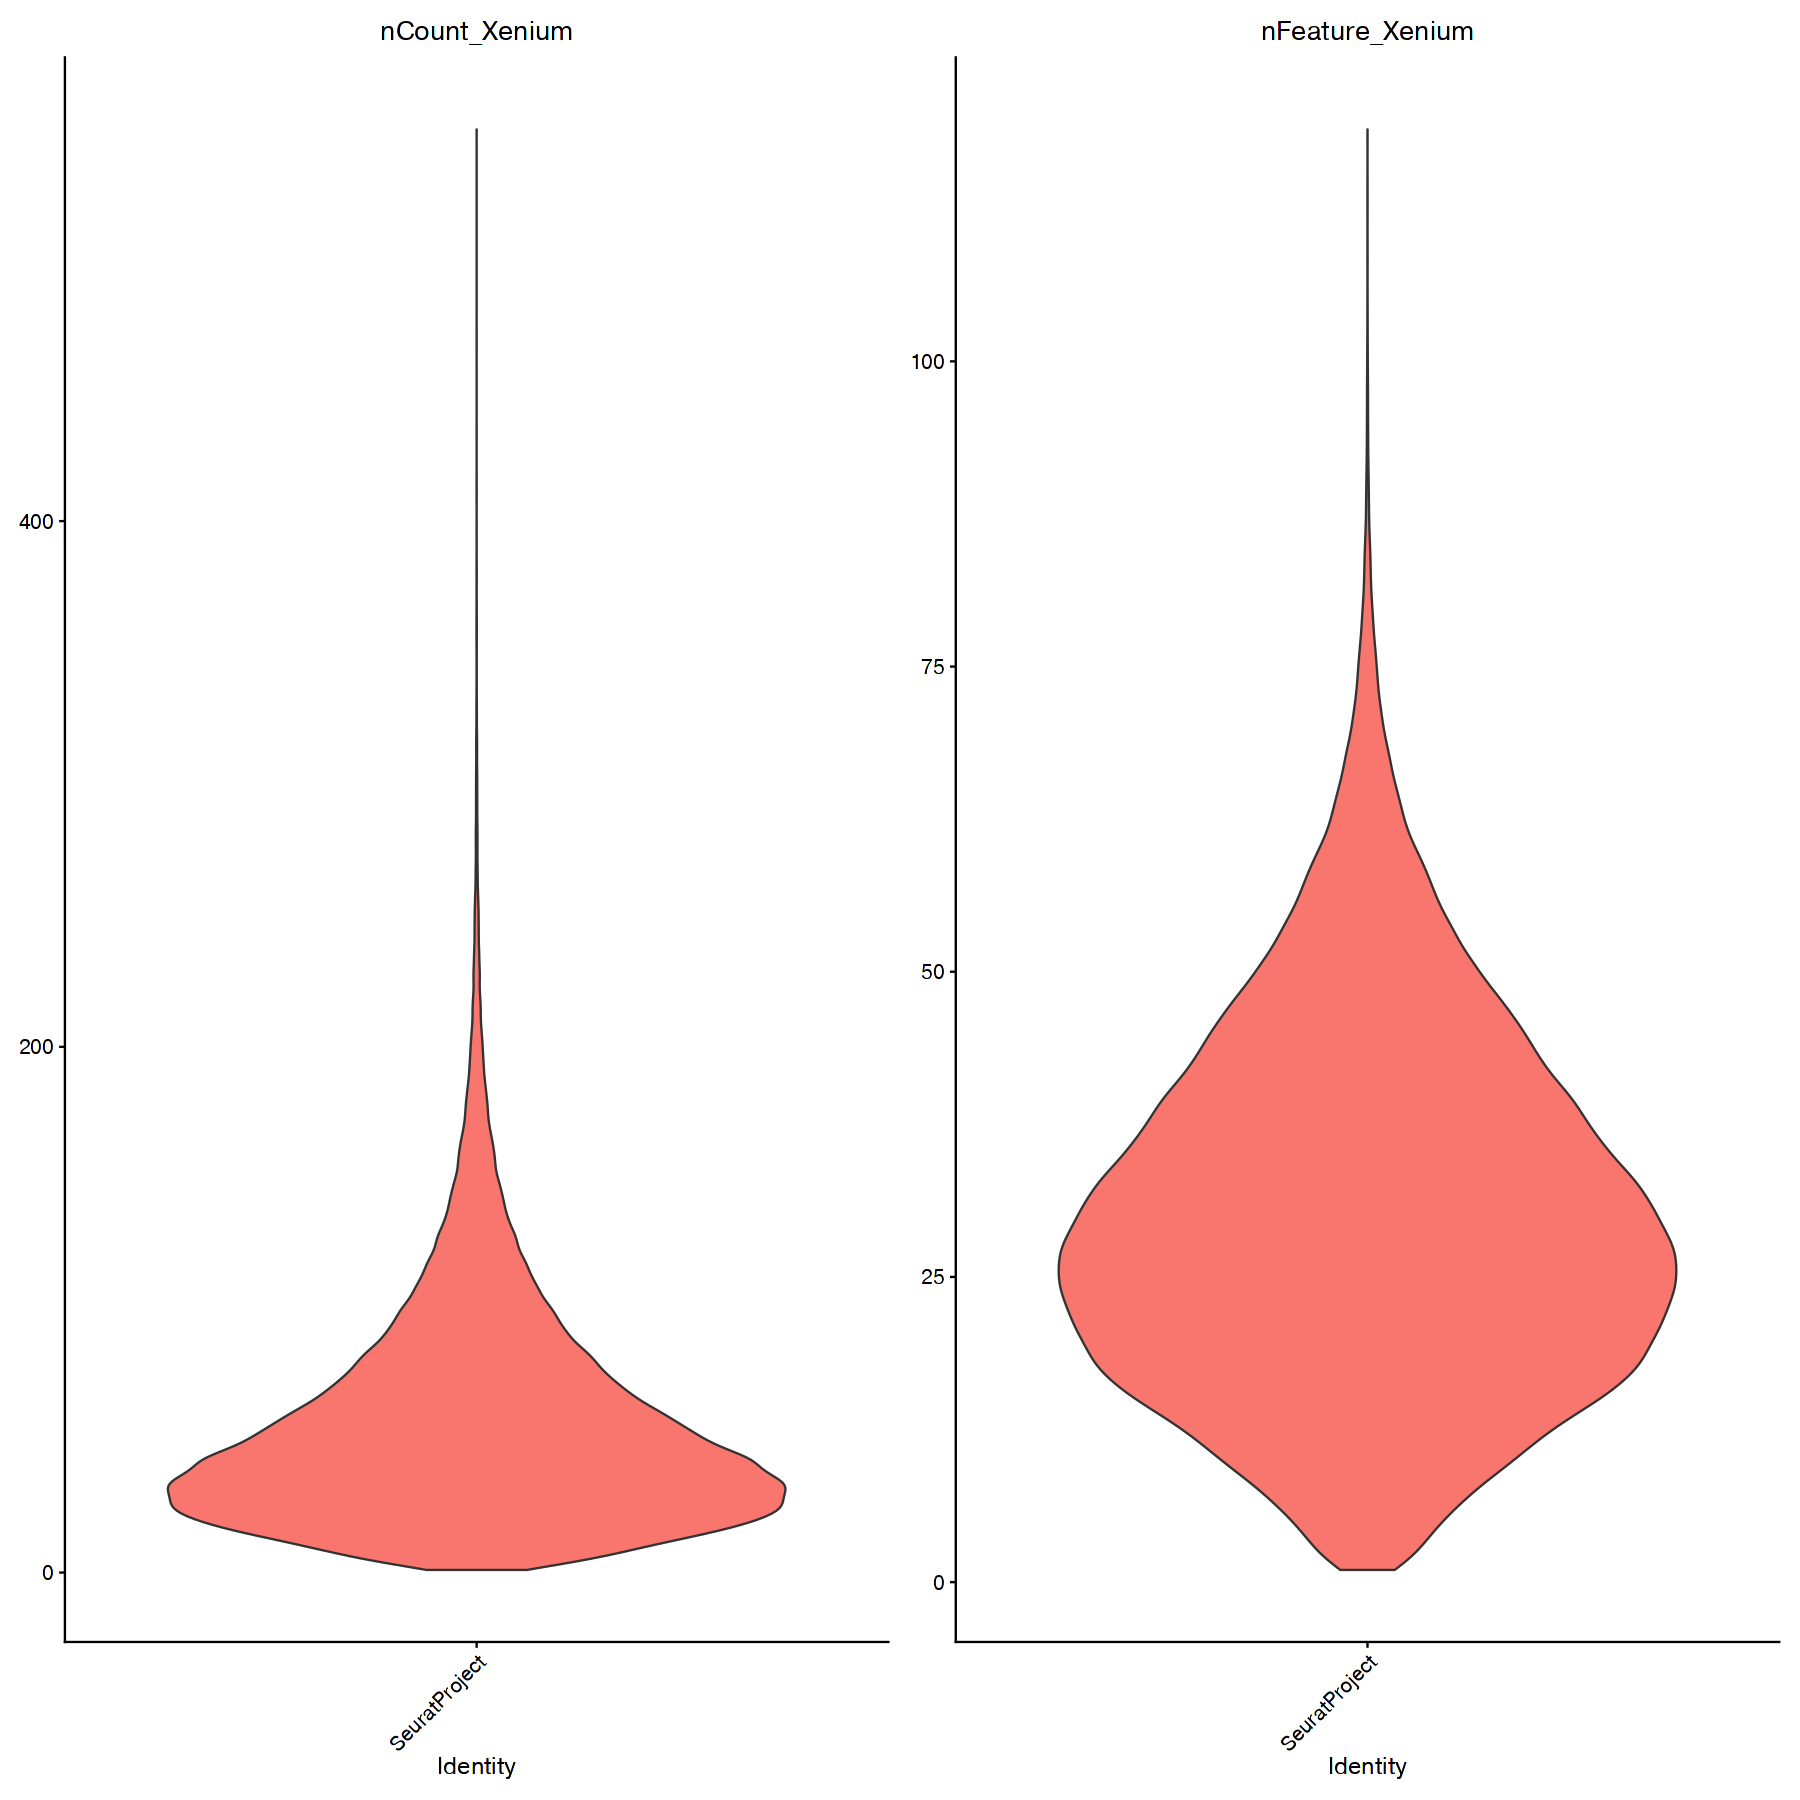

In [3]:
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)
# xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 40 & nFeature_Xenium > 15)

# Add log1p_nCount_RNA, log1p_nFeatures
xenium.obj@meta.data$nCount_Xenium_log <- log1p(xenium.obj@meta.data$nCount_Xenium)
xenium.obj@meta.data$nFeature_Xenium_log <- log1p(xenium.obj@meta.data$nFeature_Xenium)

VlnPlot(xenium.obj, features = c("nCount_Xenium", "nFeature_Xenium"), ncol = 2, pt.size = 0, group.by = "orig.ident")


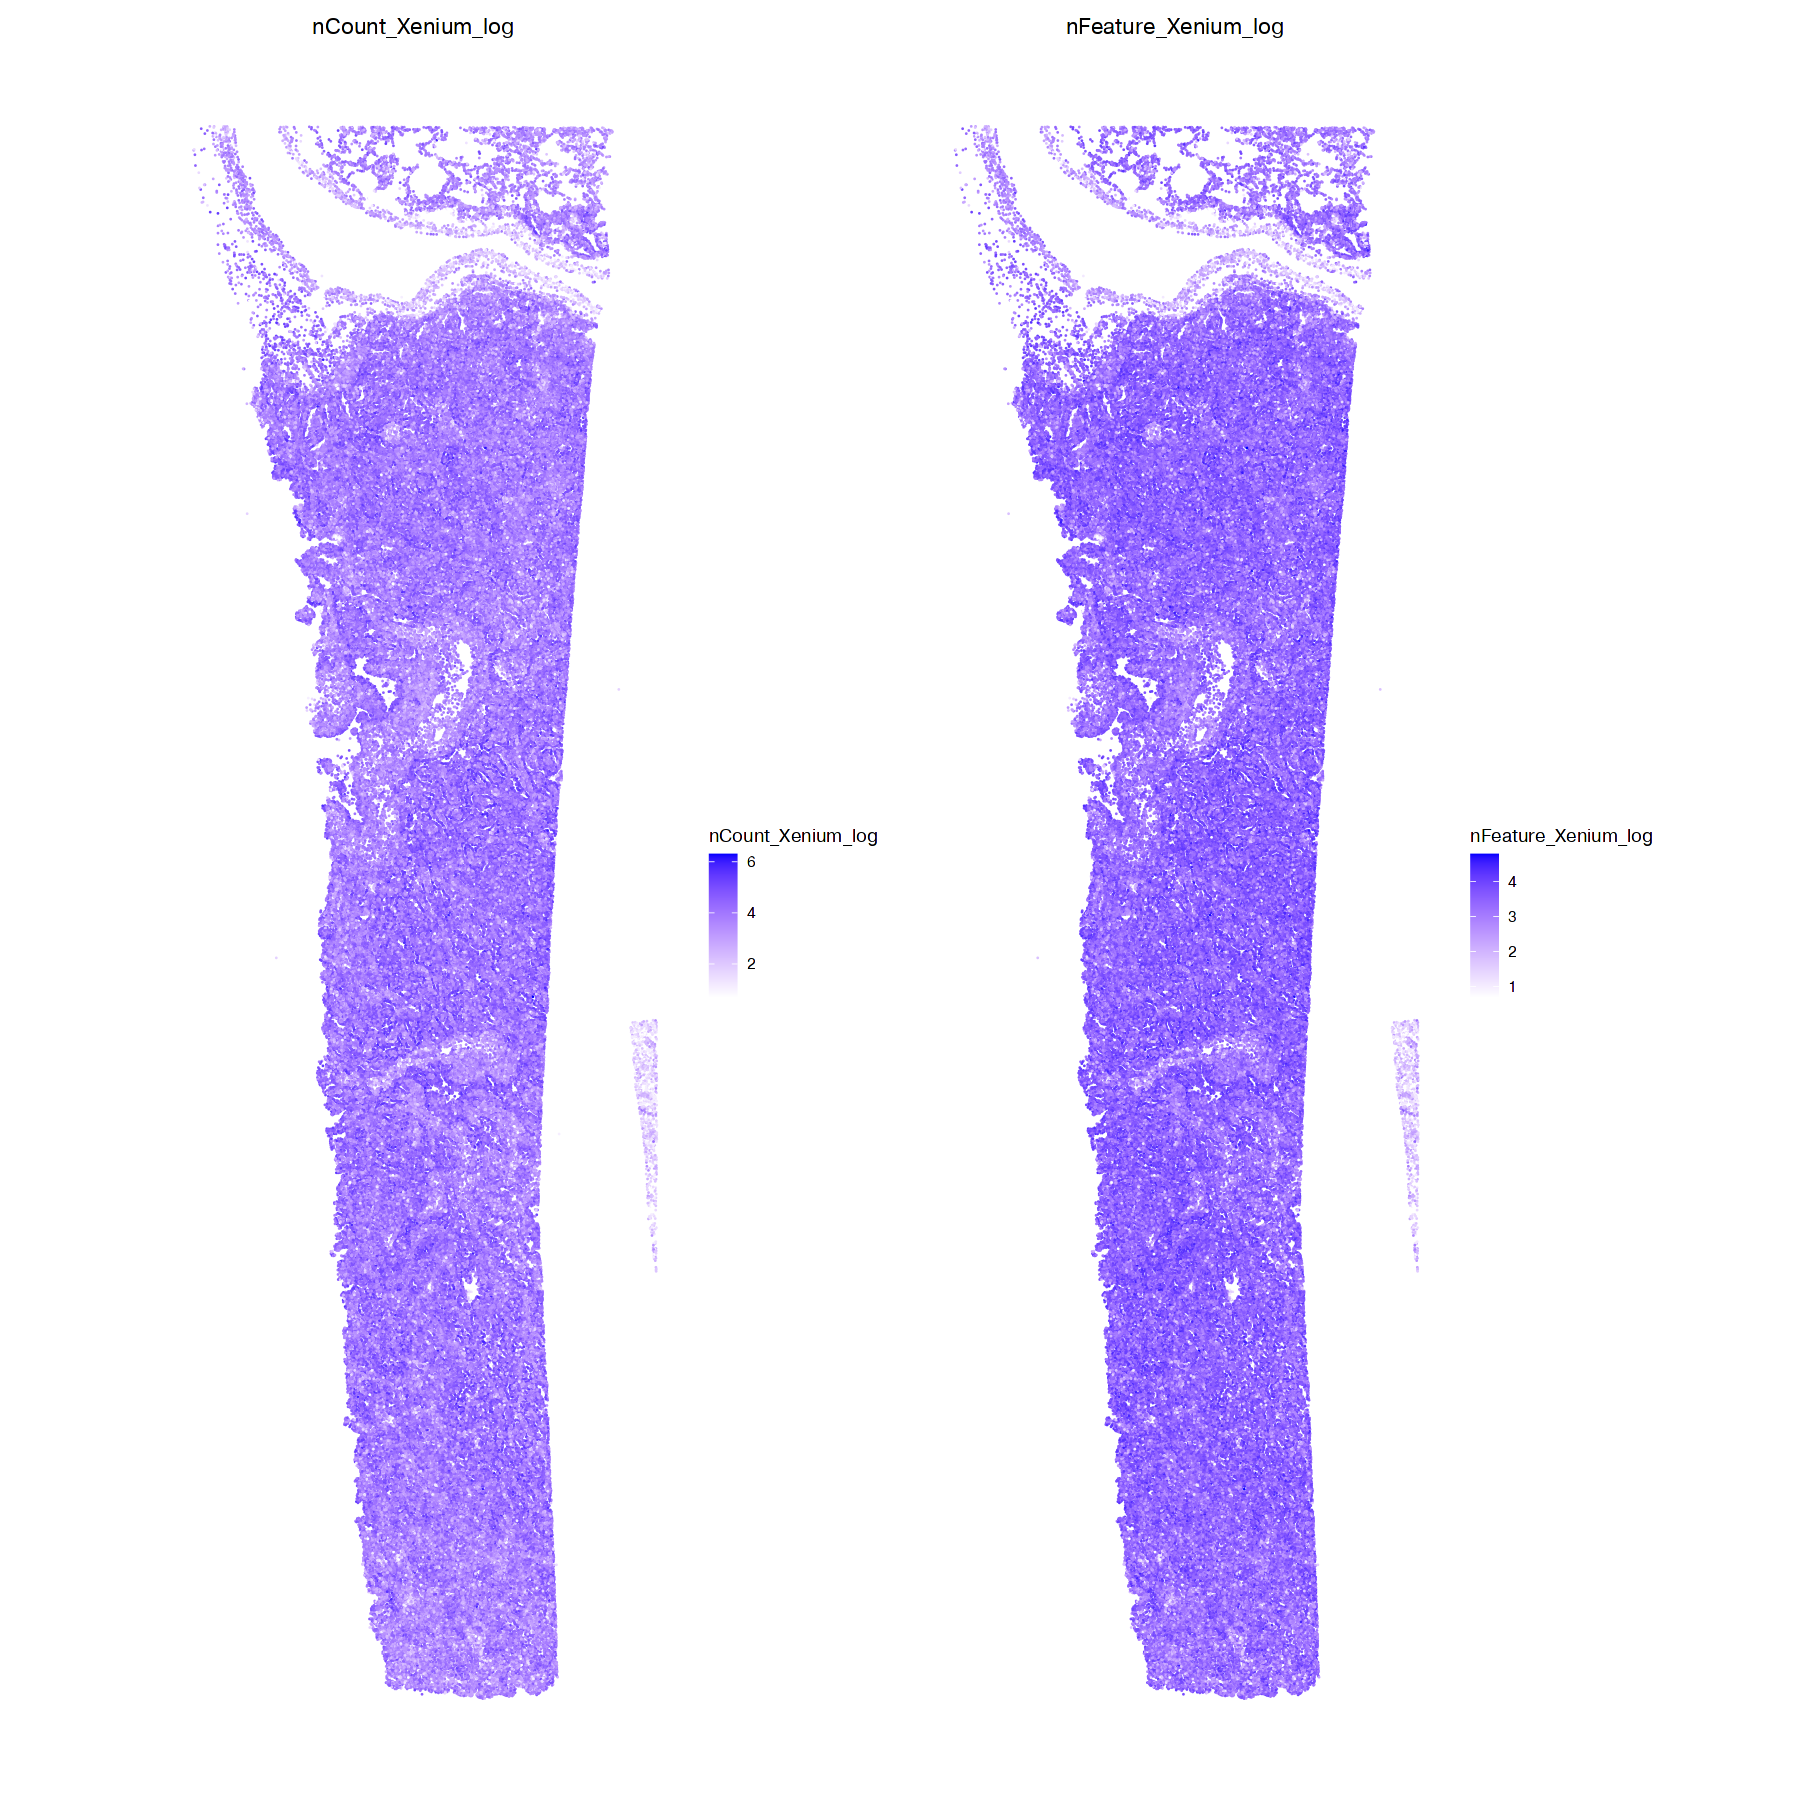

In [19]:
ImageFeaturePlot(xenium.obj, features = c("nCount_Xenium_log", "nFeature_Xenium_log"), size = 0.5, cols=c("white", "blue"), dark.background = FALSE, min.cutoff=c(0, 0))

In [4]:
rownames(xenium.obj@assays$Xenium@layers$counts) <- rownames(xenium.obj@assays$Xenium@features)
colnames(xenium.obj@assays$Xenium@layers$counts) <- Cells(xenium.obj)

In [5]:
cell_markers <- read.csv(file.path(xenium_path, "Xenium_hLung_v1_metadata.csv"), row.names = 1)
head(cell_markers)

,Ensembl_ID,Num_Probesets,Codewords,Annotation
,<chr>,<int>,<int>,<chr>
ACE,ENSG00000159640,8,1,Capillary cell
ACE2,ENSG00000130234,8,1,COVID-19
ACKR1,ENSG00000213088,8,1,Vein cell
ADAM17,ENSG00000151694,8,1,Classical monocyte
ADAM28,ENSG00000042980,8,1,B cell
ADAMTS1,ENSG00000154734,8,1,Fibromyocyte


In [6]:
cell_markers_multi <- read.csv(file.path(xenium_path, "Xenium_hMulti_v1_metadata_annotations.csv"), row.names = 1)
head(cell_markers_multi)

,Ensembl.ID,Probe.sets,Codewords,Tissues,Cell.types
,<chr>,<int>,<int>,<chr>,<chr>
ABCC11,ENSG00000121270,4,1,Breast,Glandular cells
ACE2,ENSG00000130234,8,1,General;Kidney,Smooth muscle cells;Proximal tubular cells
ACKR1,ENSG00000213088,8,1,General,Endothelial cells
ACTA2,ENSG00000107796,4,1,General;General;Liver,Fibroblasts;Smooth muscle cells;Stellate cells
ACTG2,ENSG00000163017,8,1,Breast;General,Myoepithelial cells;Smooth muscle cells
ADAM28,ENSG00000042980,8,1,General;General,B cells;Macrophages


In [8]:
# subset General or Lung
cell_markers_multi <- cell_markers_multi[grep("general|lung", cell_markers_multi$Tissues,ignore.case = TRUE), ]

long_cell_markers_multi <- data.frame(CellType = character(), Tissue = character(), Gene = character(), stringsAsFactors = FALSE)

for (i in 1:dim(cell_markers_multi)[1]) {
  cell_type <- cell_markers_multi[i, "Cell.types"]
  tissue <- cell_markers_multi[i, "Tissues"]
  gene <- rownames(cell_markers_multi)[i]

  if (any(grepl(";", tissue))) {
    tissues <- unlist(strsplit(tissue, ";"))
    celltypes <- unlist(strsplit(cell_type, ";"))

    for (j in seq_along(tissues)) {
      cell_type <- celltypes[j]
      tissue <- tissues[j]
      if (tissue == "Lung" | tissue == "General") {
        long_cell_markers_multi <- rbind(long_cell_markers_multi, data.frame(
                CellType = cell_type,
                Tissue = tissue,
                Gene = gene
        ))
      } else {
        next
      }
    }
  } else {
      if (tissue == "Lung" | tissue == "General") {
        long_cell_markers_multi <- rbind(long_cell_markers_multi, data.frame(
                CellType = cell_type,
                Tissue = tissue,
                Gene = gene
        ))
      }
  }
}


head(long_cell_markers_multi)

,CellType,Tissue,Gene
,<chr>,<chr>,<chr>
1,Smooth muscle cells,General,ACE2
2,Endothelial cells,General,ACKR1
3,Fibroblasts,General,ACTA2
4,Smooth muscle cells,General,ACTA2
5,Smooth muscle cells,General,ACTG2
6,B cells,General,ADAM28


In [9]:
# Remove replicates
long_cell_markers_multi <- long_cell_markers_multi[!duplicated(long_cell_markers_multi), ]
table(long_cell_markers_multi$CellType)


             Alveolar Type I             Alveolar Type II 
                          20                           23 
                     B cells               Ciliated cells 
                          46                           24 
                  Club cells              Dendritic cells 
                          11                            2 
           Endothelial cells             Epithelial cells 
                          82                            1 
                 Fibroblasts                 Granulocytes 
                          66                           25 
                Immune cells    Immune checkpoint markers 
                           1                            5 
                 Lymphocytes                  Macrophages 
                           1                           71 
                   Monocytes      Myeloid dendritic cells 
                          17                            1 
        Natural killer cells Plasmacytoid dendritic cel

In [ ]:
thres_list <- c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8)

for (thres in thres_list) {
  xenium.obj$celltype_by_markers_thres <- "unidentified"
  print(paste0("Processing threshold: ", thres))

  # If cell expresses all marker gene, assign it to the corresponding cell type
  for (ct in unique(long_cell_markers_multi$CellType)) {
    markers <- long_cell_markers_multi$Gene[long_cell_markers_multi$CellType == ct]
    markers <- unique(markers)
    markers_ratio <- rep(0, dim(xenium.obj@assays$Xenium@layers$counts)[2])
    for (mk_gene in markers) {
      if (mk_gene %in% rownames(xenium.obj)) {
        # Check if the gene is expressed in the cell
          cell_idx <- xenium.obj@assays$Xenium@layers$counts[mk_gene, ] > 0
          markers_ratio[cell_idx]  <- markers_ratio[cell_idx] + 1
        }
      }
    markers_ratio[markers_ratio > 0] <- markers_ratio[markers_ratio > 0] / length(markers)
    xenium.obj$celltype_by_markers_thres[markers_ratio > thres] <- ct
    }
    print("=========================================================")
    print(paste0("Cell type summary for threshold ", thres, ":"))
    print(table(xenium.obj$celltype_by_markers_thres))
    print(paste0("Percetange of cells identified: ", sum(xenium.obj$celltype_by_markers_thres != "unidentified") / dim(xenium.obj)[2] * 100, "%"))
}

[1] "Processing threshold: 0.1"
[1] "========================================================="
[1] "Cell type summary for threshold 0.1:"

             Alveolar Type I             Alveolar Type II 
                        1009                         1443 
                     B cells               Ciliated cells 
                         113                          518 
                  Club cells              Dendritic cells 
                        2516                          579 
           Endothelial cells             Epithelial cells 
                         523                        72068 
                 Fibroblasts                 Granulocytes 
                        2950                         1432 
                Immune cells    Immune checkpoint markers 
                       39374                         3336 
                 Lymphocytes                  Macrophages 
                        9388                          294 
                   Monocytes      

In [46]:
xenium.obj$celltype_by_multi_markers_0.2 <- "unidentified"

# If cell expresses all marker gene, assign it to the corresponding cell type
for (ct in unique(long_cell_markers_multi$CellType)) {
  markers <- long_cell_markers_multi$Gene[long_cell_markers_multi$CellType == ct]
  markers <- unique(markers)
  markers_ratio <- rep(0, dim(xenium.obj@assays$Xenium@layers$counts)[2])
  for (mk_gene in markers) {
    if (mk_gene %in% rownames(xenium.obj)) {
      # Check if the gene is expressed in the cell
        cell_idx <- xenium.obj@assays$Xenium@layers$counts[mk_gene, ] > 0
        markers_ratio[cell_idx]  <- markers_ratio[cell_idx] + 1
      }
    }
  markers_ratio[markers_ratio > 0] <- markers_ratio[markers_ratio > 0] / length(markers)
  xenium.obj$celltype_by_multi_markers_0.2[markers_ratio > 0.2] <- ct
  }

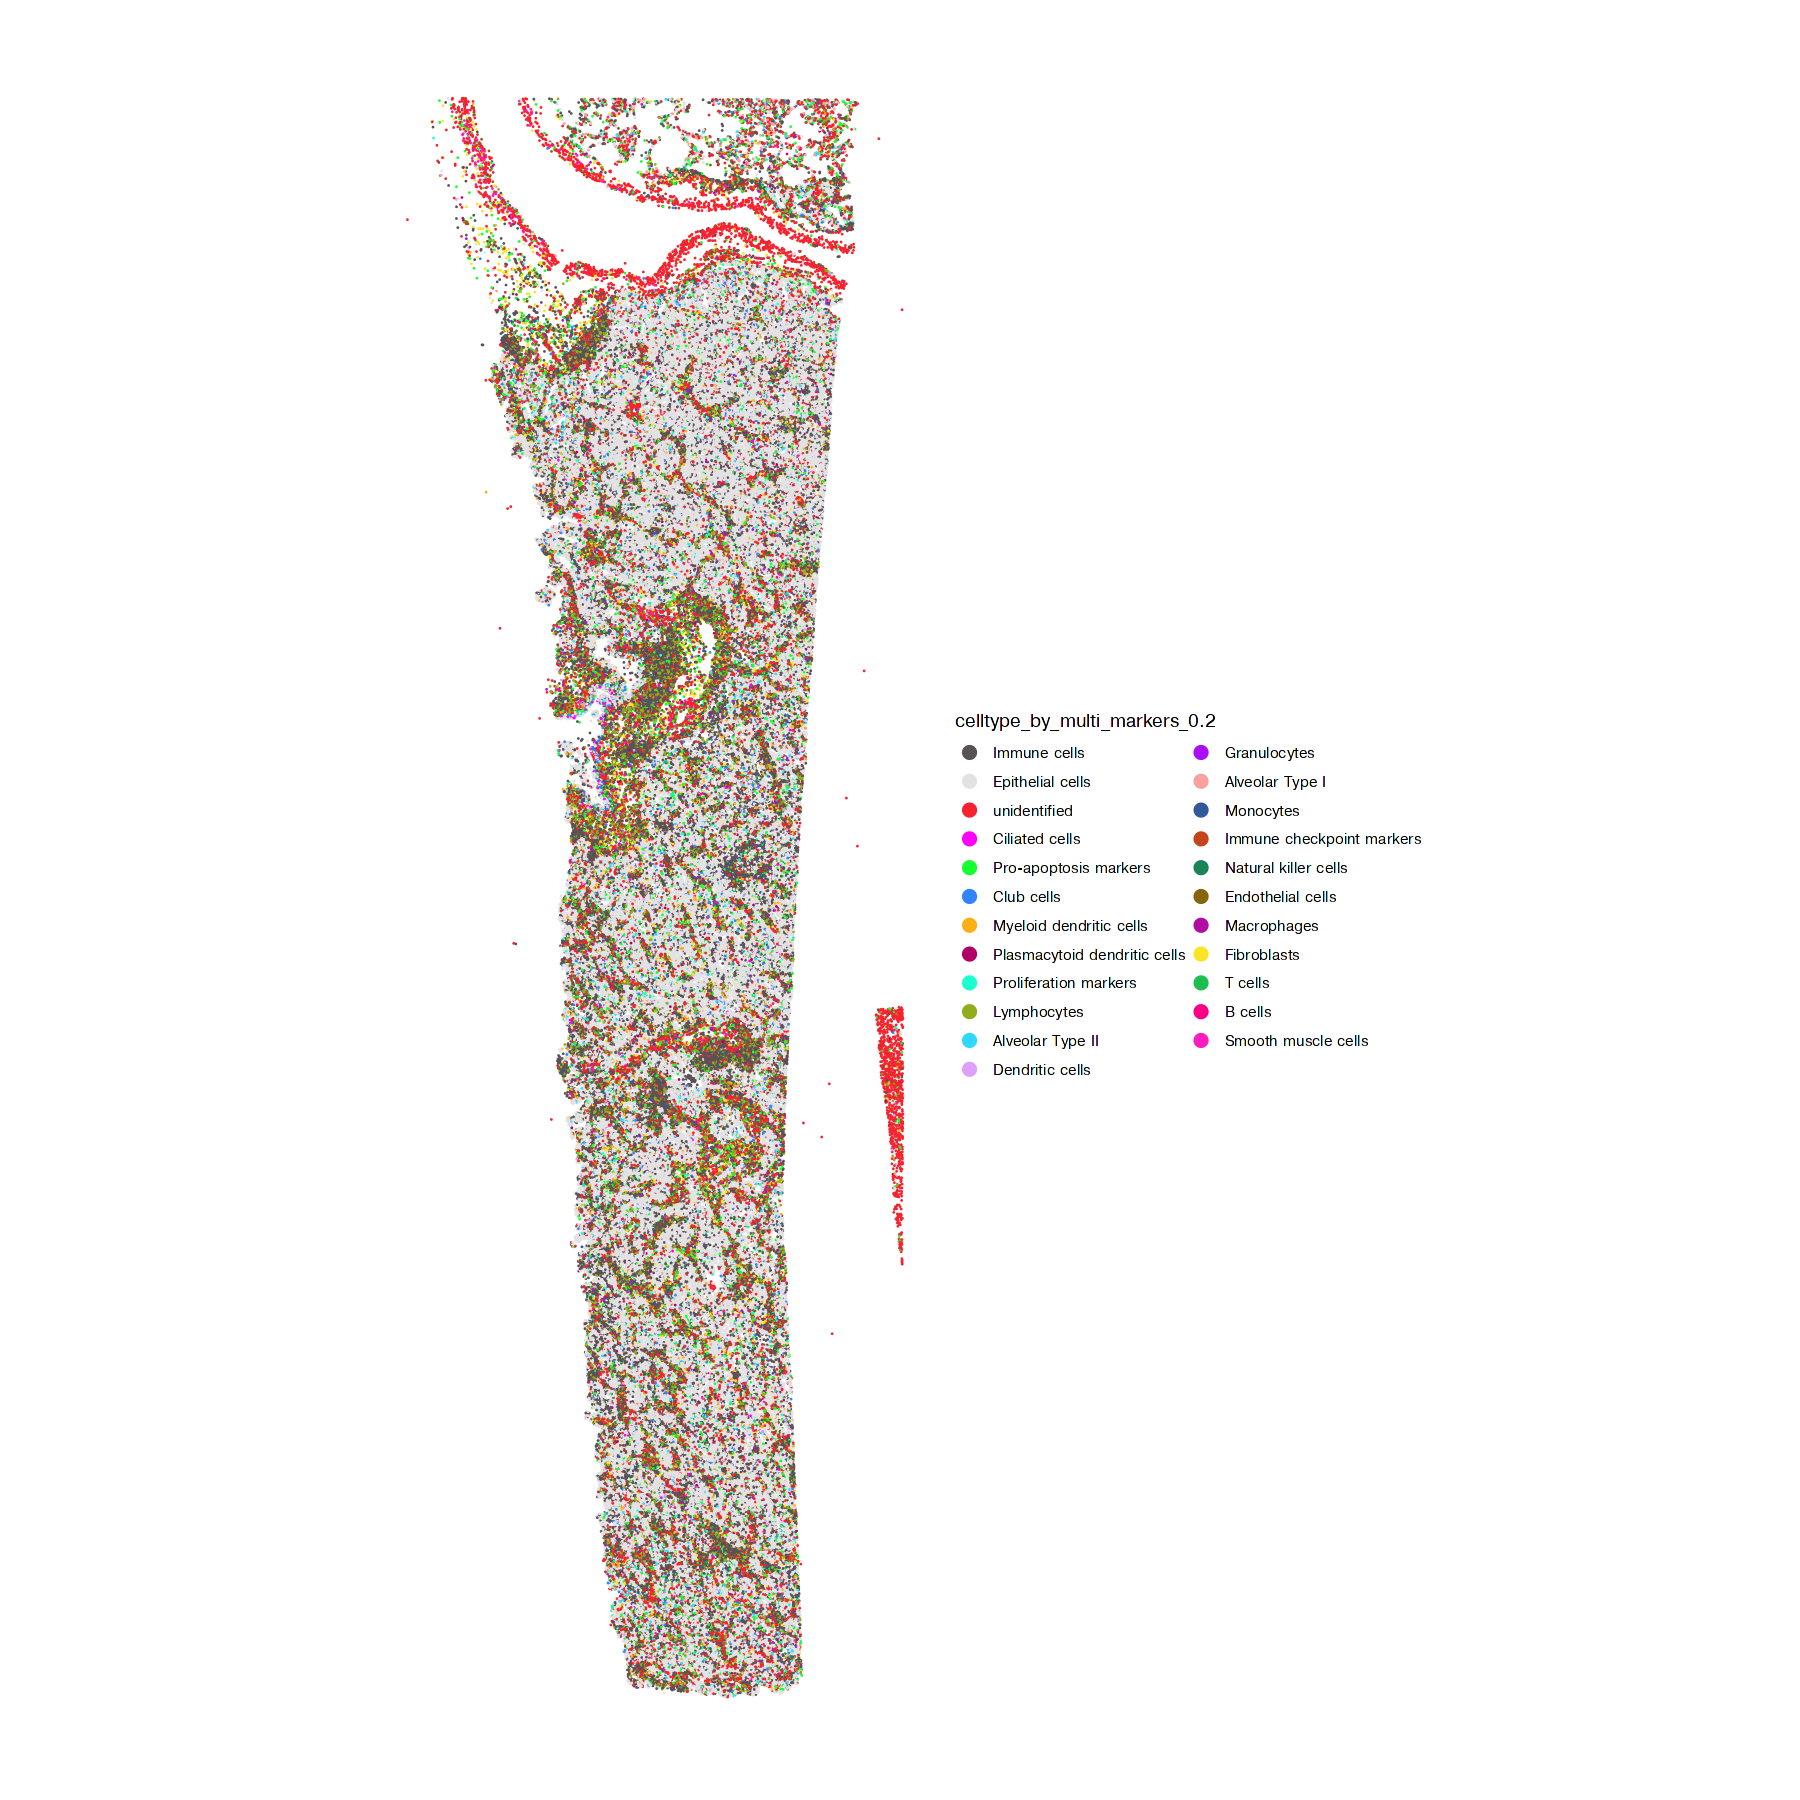

In [47]:
ImageDimPlot(xenium.obj, fov = "fov", group.by = c("celltype_by_multi_markers_0.2"), cols = "polychrome", size = 0.5, dark.background = FALSE)

In [48]:
xenium_v1_multi_celltype <- data.frame(cell_id = colnames(xenium.obj), group = xenium.obj$celltype_by_multi_markers_0.2)
head(xenium_v1_multi_celltype)
write.csv(xenium_v1_multi_celltype, file = file.path(xenium_path, "xenium_v1_multi_celltype_by_markers_0.2.csv"), row.names = FALSE)

,cell_id,group
,<chr>,<chr>
aaaaficg-1,aaaaficg-1,Immune cells
aaabbaka-1,aaabbaka-1,Epithelial cells
aaabbjoo-1,aaabbjoo-1,Epithelial cells
aaablchg-1,aaablchg-1,Epithelial cells
aaacaicl-1,aaacaicl-1,Immune cells
aaacfcef-1,aaacfcef-1,Epithelial cells
